# WW domain notebook. 
The WW domain is a short binding domain targeting proline-rich motifs. WW domains are usually classified into 4 types, according to their binding specificity toward different motifs (e.g. PPXY, PPLP p[T/S]P...). We show here some features found by the algorithm.

## Loading data and packages

../source/numba_utilities.py:1124: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, F), array(float32, 2d, A))
  dmean_v_dw = np.dot(s1.T, V)
../source/numba_utilities.py:1125: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, F), array(float32, 2d, A))
  dvar_e_dw = np.dot(s2.T, V)
../source/numba_utilities.py:1126: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, F), array(float32, 2d, A))
  tmp3 = np.dot(s3.T, V)
../source/numba_utilities.py:961: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 1d, A), array(float32, 2d, A))
  mean_V = np.dot(weights, V) / sum_weights


First five sequences of the alignment:
['LPGEWKPCQDIT-GDIYYFNFANGQSMWDHP', '--FPWIELKSSKTGQFYYFNRNSNVSTYTLP', 'LPEHWKACRSEK-GELYYFNFKTGESNWDHP', 'LPKNWEMAYTDT-GMIYFIDHNTKTTTWLDP', 'LPLGWVDAKDPASGATYYYNQHTRTCQWERP']
First five sequences of the alignment (numerical format)
[[ 9 12  5  3 18  8 12  1 13  2  7 16 20  5  2  7 19 19  4 11  4  0 11  5
  13 15 10 18  2  6 12]
 [20 20  4 12 18  7  3  9  8 15 15  8 16  5 13  4 19 19  4 11 14 11 15 11
  17 15 16 19 16  9 12]
 [ 9 12  3  6 18  8  0  1 14 15  3  8 20  5  3  9 19 19  4 11  4  8 16  5
   3 15 11 18  2  6 12]
 [ 9 12  8 11 18  3 10  0 19 16  2 16 20  5 10  7 19  4  7  2  6 11 16  8
  16 16 16 18  9  2 12]
 [ 9 12  9  5 18 17  2  0  8  2 12  0 15  5  0 16 19 19 19 11 13  6 16 14
  16  1 13 18  3 14 12]]
0
1000
2000
3000
4000
5000
6000
7000


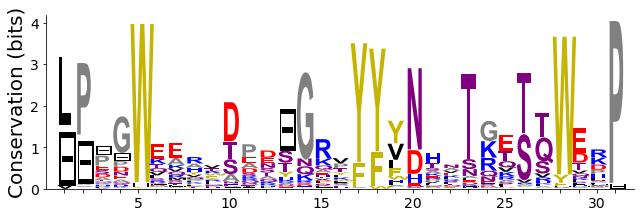

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('../source/')
sys.path.append('../utilities/')
from common_imports import set_num_threads
set_num_threads(2) # Set the number of cores. Must be executed before importing numpy&numba.
import numpy as np
import rbm,utilities
import pandas as pd
import pickle
import Proteins_utils, RBM_utils, utilities,sequence_logo,plots_utils


filename = 'WW_domain_MSA.fasta'
path = u'../data/WW/'

all_data = Proteins_utils.load_FASTA(path+filename,drop_duplicates=True)

print('First five sequences of the alignment:')
print(Proteins_utils.num2seq(all_data[:5]))

print('First five sequences of the alignment (numerical format)')
print(all_data[:5])

seed = utilities.check_random_state(0) 
permutation = np.argsort(seed.rand(all_data.shape[0]))
all_data = all_data[permutation] # Shuffle data.

num_neighbours= Proteins_utils.count_neighbours(all_data)
all_weights = (1.0/num_neighbours).astype(np.float32)


env = pickle.load(open(path+'WW_test_sequences.data','rb'),encoding="latin1")
for key,item in env.items():
    if 'sequence' in key:
        globals()[key] = item.astype(np.int16)
    else:
        globals()[key] = item
    
labeled_sequences = np.concatenate(
    [sequences_1,sequences_2,sequences_3,sequences_4,sequences_unknown],axis=0)

labels = np.concatenate([np.ones(len(sequences_1),dtype=np.int) * 1,
          np.ones(len(sequences_2),dtype=np.int) * 2,
          np.ones(len(sequences_3),dtype=np.int) * 3,
          np.ones(len(sequences_4),dtype=np.int) * 4,
          np.ones(len(sequences_unknown),dtype=np.int) * 5
         ], axis=0)


mu = utilities.average(all_data,c=21,weights=all_weights)

sequence_logo.Sequence_logo(mu,ticks_every=5);



In [2]:
n_v = 31 # Number of visible units; = # sites in alignment.
n_h = 50 # Number of hidden units.
visible = 'Potts' # Nature of visible units potential. Here, Potts states...
n_cv = 21 # With n_cv = 21 colors (all possible amino acids + gap)
hidden = 'dReLU' # Nature of hidden units potential. Here, dReLU potential.

RBM = rbm.RBM(visible = visible,hidden = hidden,n_v = n_v,n_h = n_h, n_cv = n_cv)

batch_size = 100 # Size of mini-batches (and number of Markov chains used). Default: 100. 
n_iter = 500 # Number of epochs.
learning_rate = 5e-3 # Initial learning rate (default: 5e-3).
decay_after = 0.5 # Decay learning rate after 50% of iterations (default: 0.5).
l1b = 0.25 # L1b regularization. Default : 0.
N_MC = 10 # Number of Monte Carlo steps between each update.

RBM.fit(all_data, weights= all_weights, batch_size = batch_size,
    n_iter = n_iter, l1b = l1b, N_MC = N_MC, 
   decay_after = decay_after, verbose = 0 ,vverbose=1)



Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Starting epoch 51
Starting epoch 52
Starting epoch 53
Starting epoch 54
Starting epoch 55
Starting epoch 56
S

Starting epoch 438
Starting epoch 439
Starting epoch 440
Starting epoch 441
Starting epoch 442
Starting epoch 443
Starting epoch 444
Starting epoch 445
Starting epoch 446
Starting epoch 447
Starting epoch 448
Starting epoch 449
Starting epoch 450
Starting epoch 451
Starting epoch 452
Starting epoch 453
Starting epoch 454
Starting epoch 455
Starting epoch 456
Starting epoch 457
Starting epoch 458
Starting epoch 459
Starting epoch 460
Starting epoch 461
Starting epoch 462
Starting epoch 463
Starting epoch 464
Starting epoch 465
Starting epoch 466
Starting epoch 467
Starting epoch 468
Starting epoch 469
Starting epoch 470
Starting epoch 471
Starting epoch 472
Starting epoch 473
Starting epoch 474
Starting epoch 475
Starting epoch 476
Starting epoch 477
Starting epoch 478
Starting epoch 479
Starting epoch 480
Starting epoch 481
Starting epoch 482
Starting epoch 483
Starting epoch 484
Starting epoch 485
Starting epoch 486
Starting epoch 487
Starting epoch 488
Starting epoch 489
Starting epo

{}

## Evaluate accuracy of training: Train and test set likelihood

In [3]:
RBM.AIS(n_betas=20000,verbose=1) # Compute partition function with annealed importance sampling
print(utilities.average(RBM.likelihood(all_data), weights=all_weights)/31)



Initial evaluation: log(Z) = [292.26416]
Mismatch dimensions (100, 50), [10, 50], reinitializating I
Mismatch dimensions (100, 31, 21), [10, 31, 21], reinitializating I
Iteration 2000, beta: 0.10000500025001251
Current evaluation: log(Z)= 289.8461 +- 0.005718937066744189
Iteration 4000, beta: 0.20001000050002501
Current evaluation: log(Z)= 288.1546 +- 0.007207030415582107
Iteration 6000, beta: 0.3000150007500375
Current evaluation: log(Z)= 287.0082 +- 0.007630091167666145
Iteration 8000, beta: 0.40002000100005003
Current evaluation: log(Z)= 286.30872 +- 0.007784424450987023
Iteration 10000, beta: 0.5000250012500626
Current evaluation: log(Z)= 285.9831 +- 0.011056690944479499
Iteration 12000, beta: 0.600030001500075
Current evaluation: log(Z)= 286.01312 +- 0.013587901218673945
Iteration 14000, beta: 0.7000350017500875
Current evaluation: log(Z)= 286.3663 +- 0.013566884980991317
Iteration 16000, beta: 0.8000400020001001
Current evaluation: log(Z)= 287.07623 +- 0.016630991177026447
Iterat

# Selecting interesting hidden units.
Since the learning process is stochastic, each training produces different weights.
An important part resides in selecting potentially important features. Here, our selection is based on the following criteria:

- Hidden unit importance score. Similarly to PCA, hidden units contribute differently to the likelihood.

- Weight sparsity. Sparser weights are often easier to interpretate.

- Gap fraction. For real protein families, some hidden units model extended gap modes. Most of them are not functionally relevant, we want to discard them.

- Jump and asymmetry of the hidden unit non-linearity <h_\mu | I_\mu>. When using dReLU potentials, the shape of the non-linearity adapts to the hidden unit input statistics. Hidden units with large jumps often have a bimodal input distribution. Such hidden units partition the sequence space into subgroups that could have distinct functionality. When the asymmetry is strong, one of the subgroups is usually much smaller.

- High correlation with known labels (subfamily types, etc.)



Mismatch dimensions (10, 50), [200, 50], reinitializating I
Mismatch dimensions (10, 31, 21), [200, 31, 21], reinitializating I


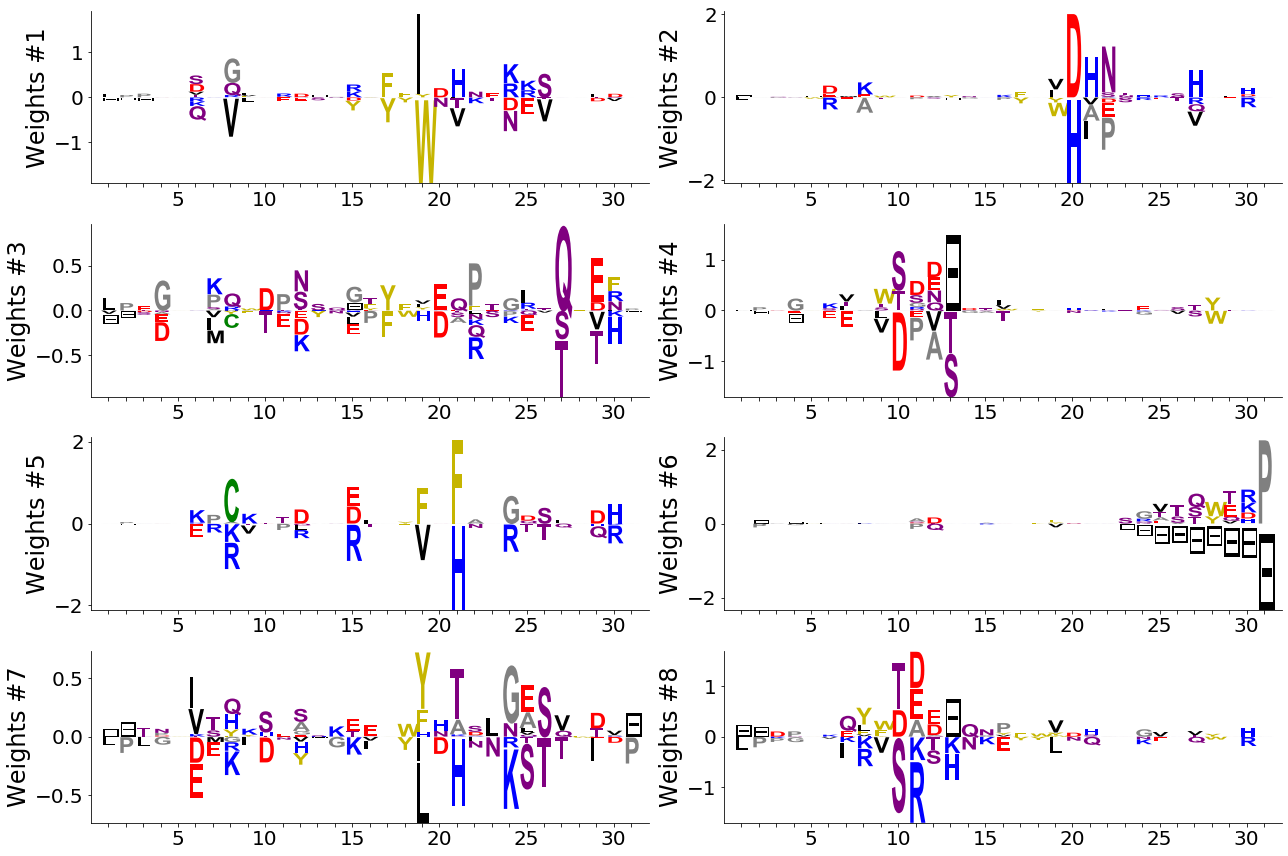

In [4]:
# # Feature importance.    

DeltaL = RBM_utils.get_hidden_unit_importance(RBM,all_data,weights=all_weights)

# Sparsity
p = RBM_utils.get_sparsity(RBM.weights)

# Jump and asymmetry.
jump = RBM_utils.get_hlayer_jump(RBM)
asymmetry = RBM_utils.get_hlayer_asymmetry(RBM)


# Gap fraction
gap_fraction = RBM_utils.get_norm_gaps(RBM.weights,a=1)/RBM_utils.get_norm(RBM.weights,a=1)




i1 = np.argsort(p - 100. * (gap_fraction<0.3))[0] # High sparsity unit.
i2 = np.argsort(p-100. * (gap_fraction<0.3))[1] # High sparsity unit.
i3 = np.argsort(p-100. * (gap_fraction<0.3))[10] # Intermediate sparsity unit.
i4 = np.argsort(100. * (gap_fraction<0.3) + DeltaL)[-2] # Intermediate Delta L contribution, not a gap mode.
i5 = np.argsort(100. * (gap_fraction<0.3) + DeltaL)[-1] # High Delta L contribution, not a gap mode.
i6 = np.argsort(gap_fraction)[-1] # One gap mode.


# High correlation with known metadata.

h = RBM.mean_hiddens(labeled_sequences)

is_234 = 1.0 * ( (labels == 2) | (labels == 3) | (labels==4) )
is_1 =  1.0 * (labels==1)
is_23 = 1.0 * ( (labels == 2) | (labels == 3)  )
is_4 = 1.0 * (labels==4)

first_target = (is_234-is_1)
second_target = (is_23-is_4)
correlation = np.corrcoef(h[first_target!=0].T, first_target[np.newaxis,first_target!=0])[:-1,-1]
i7 = np.argsort(np.abs(correlation))[-1] # Correlation

correlation = np.corrcoef(h[second_target!=0].T, second_target[np.newaxis,second_target!=0])[:-1,-1]
i8 = np.argsort(np.abs(correlation))[-1]


interesting_features = [i1,i2,i3,i4,i5,i6,i7,i8]
nsites = len(interesting_features)
fig = sequence_logo.Sequence_logo_multiple(RBM.weights[interesting_features],ncols=2
                                           ,ticks_every=5,ticks_labels_size=20,title_size=24);




## Visualizing hidden units: Distribution of inputs and non-linearity.
Protein sequences cluster according to the projections onto the weights.

../utilities/plots_utils.py:92: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax2_.hist(I[:,subset[i]],normed=True,weights=weights,bins=100)


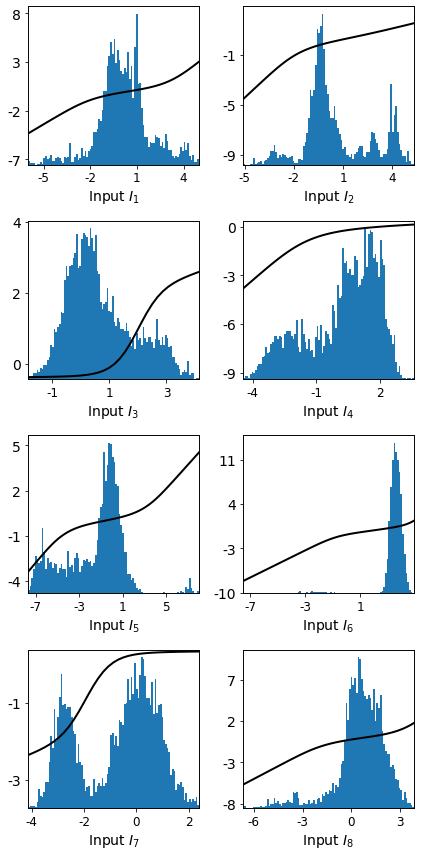

In [5]:
I = RBM.input_hiddens(all_data) # compute hidden unit input.
# Show inputs histogram and conditional means
plots_utils.plot_input_mean(RBM,I, interesting_features,ncols=2); 

## Visualizing hidden units: Phylogenic activity.
Are the features active across all, or only a portion of the phylogenic tree ? To assess this, we pick for each hidden unit the 20 sequences with highest $I_\mu$ (or lowest, depending on the sign of the non-linearity), and compute the distances between each pair. We compare to the background distribution of pairwise distances

../utilities/plots_utils.py:320: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax_.hist(all_distances,bins=RBM.n_v,normed=True,range=(0,1),color = 'gray',alpha = 0.5)
../utilities/plots_utils.py:321: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax_.hist(distance_top_features[subset[i]],bins=RBM.n_v,normed=True,range=(0,1),alpha=0.5)


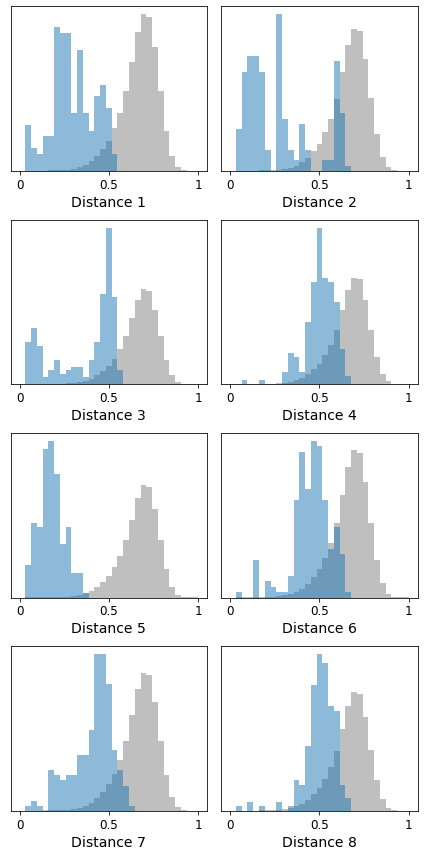

In [6]:
# Compute histogram of distances between top-activating sequences.
plots_utils.plot_top_activating_distance(RBM, I,all_data,interesting_features,ncols=2);

# Visualize all weights
Make all the previous plots, for all hidden units into a single pdf. In addition, optionally displays the weight on a structure (provide either a pdb id or path to a pdb file).
Requirements:
- With or without the structures: pdfjoin (command line utility).
- For displaying the structure:
    - the Biopython package for parsing structure files.
    - HMMER for aligning the pdb sequence to the alignment.
    - Chimera.
- Change the paths in Proteins_3D_utils.py


In [7]:
with_structure   = True

if with_structure:
    plots_utils.make_all_weights(RBM,all_data,pdb_file='2n1o',
                                 weights=all_weights,name = 'all_weights_WW.pdf',
                                 weights_per_page = 5);
else:
    plots_utils.make_all_weights(RBM,all_data,
                                 weights=all_weights,name = 'all_weights_WW.pdf',
                                 weights_per_page = 10);

2n1o is a PDB id
/Volumes/Carte_SD/PDB_files/pdb2n1o.ent has 2 chains
['A', 'B']
Learning the mapping between MSA columns and PDB sequence index from the alignment...
Iteration 1: LPPGWEKRMSRSSGRVYYFNHITNASQWERPsgripplpf,
31
Iteration 1, fraction of sites mapped on the structure: 1.00
Iteration 2: LPPGWEKRMSRSSGRVYYFNHITNASQWERPsgripplpf,
31
Iteration 2, fraction of sites mapped on the structure: 1.00
Iteration 3: LPPGWEKRMSRSSGRVYYFNHITNASQWERPsgripplpf,
31
Iteration 3, fraction of sites mapped on the structure: 1.00
Mapping learnt...


../utilities/plots_utils.py:92: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax2_.hist(I[:,subset[i]],normed=True,weights=weights,bins=100)
../utilities/plots_utils.py:320: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax_.hist(all_distances,bins=RBM.n_v,normed=True,range=(0,1),color = 'gray',alpha = 0.5)
../utilities/plots_utils.py:321: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax_.hist(distance_top_features[subset[i]],bins=RBM.n_v,normed=True,range=(0,1),alpha=0.5)


Make all weights: Done.


# Classification into specificites
Hidden units 4 and 5 partition the family into 3 clusters, that identify with the specificity-based classification. 

The YAP1 WW domain (blue cross) is of Type I, but mutations that bring it toward the Type II cluster (orange crosses) improve its activity on Type II ligands.

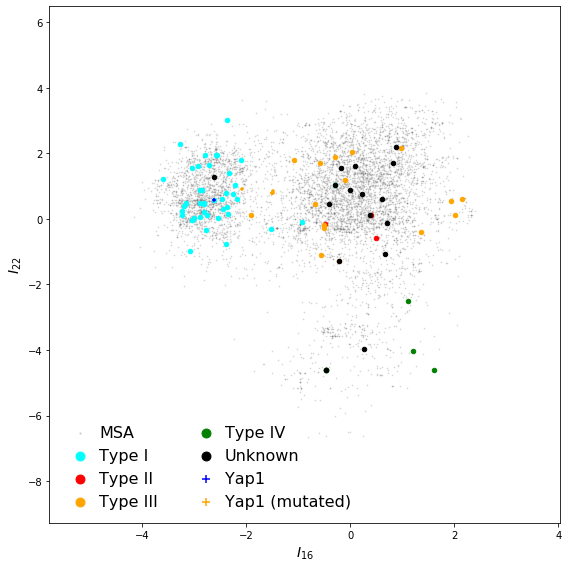

In [8]:
## Visualize specificities.


I  = RBM.input_hiddens(all_data)
I1 = RBM.input_hiddens(sequences_1)
I2 = RBM.input_hiddens(sequences_2)
I3 = RBM.input_hiddens(sequences_3)
I4 = RBM.input_hiddens(sequences_4)
Iu = RBM.input_hiddens(sequences_unknown)
I_yap = RBM.input_hiddens(sequence_yap_paper)
I_yap_mutated = RBM.input_hiddens(sequence_yap_paper_mutated)


I_classes = [I1,
             I2,
             I3,
             I4,
             Iu,
             I_yap,
             I_yap_mutated
            ]

class_names = [
    'Type I',
    'Type II',
    'Type III',
    'Type IV',
    'Unknown',
    'Yap1',
    'Yap1 (mutated)']

class_colors = [
    'cyan','red','orange','green','black','blue','orange']

class_markers = ['o','o','o','o','o','+','+']

plots_utils.plot_input_classes_scatter([i7,i8],I, I_classes,class_names = class_names,class_colors=class_colors,
                                       markers=class_markers,ncols_legend=2,
                                       #background_markersize=1,
                                       markersize=20,figsize=8,fontsize=14);





## Sampling from trained RBM.
Combining low-temperature sampling (with the duplicate RBM trick)  and conditional sampling allows to generate high-quality sequences with prescribed combinations of features, including ones that are unseen in the MSA. Here we generate sequences with 4 possible combinations of feature 4 and 5, corresponding to Type I, Type II/II, Type IV and an unknown specificity

In [12]:
same_sign_as_paper2

False

Hidden unit 15, negative value: -2.48, positive value: 0.46
Hidden unit 21, negative value: -2.08, positive value: 0.59


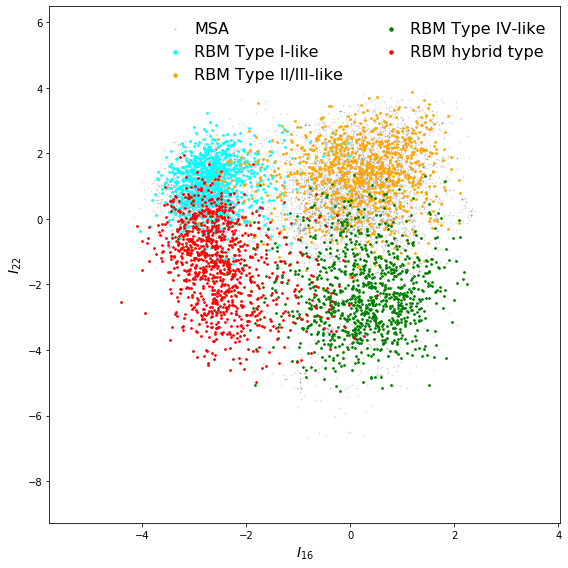

In [13]:
### Conditional Sampling: Generate sequences with prescribed combinations of features 6 and 7 including unseen combinations.

# First, determine values for conditioning the hidden units. 
# First, we compute the mean value in the negative and positive sides of the distribution.
# Then, we apply a multiplier. Using larger multiplier results in more polarized conditional distributions.
conditioning_features = [i7,i8]

value_neg = []
value_pos = []
multiplier = 1.5
margin = 0.25
for conditioning_feature in conditioning_features:
    h_ = h[:,conditioning_feature]
    value_neg.append( multiplier * h_[h_<-margin].mean() )
    value_pos.append( multiplier * h_[h_>margin].mean() )    
    print('Hidden unit %s, negative value: %.2f, positive value: %.2f'%(conditioning_feature,value_neg[-1],value_pos[-1]) )


cond_pp = [(conditioning_features[0],value_pos[0]), (conditioning_features[1],value_pos[1]) ]
cond_pm = [(conditioning_features[0],value_pos[0]), (conditioning_features[1],value_neg[1]) ]
cond_mp = [(conditioning_features[0],value_neg[0]), (conditioning_features[1],value_pos[1]) ]
cond_mm = [(conditioning_features[0],value_neg[0]), (conditioning_features[1],value_neg[1]) ]
    
    

# Depending on the training seed, the signs can be reverted from the ones of the eLife paper.
same_sign_as_paper1 = np.sign(RBM.mean_hiddens(sequences_1)[:,i7].mean() - RBM.mean_hiddens(sequences_3)[:,i7].mean() ) == -1
same_sign_as_paper2 = np.sign(RBM.mean_hiddens(sequences_3)[:,i8].mean()-  RBM.mean_hiddens(sequences_4)[:,i8].mean() ) == 1


if same_sign_as_paper1 & same_sign_as_paper2:
    cond_Type1 = cond_mp
    cond_Type23 = cond_pp
    cond_Type4 = cond_pm
    cond_TypeHybrid = cond_mm        
elif same_sign_as_paper1 & ~same_sign_as_paper2:
    cond_Type1 = cond_mm
    cond_Type23 = cond_pm
    cond_Type4 = cond_pp
    cond_TypeHybrid = cond_mp
elif ~same_sign_as_paper1 & same_sign_as_paper2:
    cond_Type1 = cond_pp
    cond_Type23 = cond_mp
    cond_Type4 = cond_mm
    cond_TypeHybrid = cond_pm        
elif ~same_sign_as_paper1 & ~same_sign_as_paper2:
    cond_Type1 = cond_pm
    cond_Type23 = cond_mm
    cond_Type4 = cond_mp
    cond_TypeHybrid = cond_pp    
    

# Build new conditional RBMs, with M-2 hidden units.
condRBM_Type1 = RBM_utils.conditioned_RBM(RBM,cond_Type1)
condRBM_Type23 = RBM_utils.conditioned_RBM(RBM,cond_Type23)
condRBM_Type4 = RBM_utils.conditioned_RBM(RBM,cond_Type4)
condRBM_TypeHybrid = RBM_utils.conditioned_RBM(RBM,cond_TypeHybrid)


# Generate sequences.
N_sequences = 1000
N_PT = 1
Nstep = 10


datav_Type1,datah_Type1 = condRBM_Type1.gen_data(Nchains = 100, Lchains = N_sequences//100,Nstep=Nstep,N_PT=N_PT,update_betas=False,Nthermalize=500)
datav_Type23,datah_Type23 = condRBM_Type23.gen_data(Nchains = 100, Lchains = N_sequences//100,Nstep=Nstep,N_PT=N_PT,update_betas=False,Nthermalize=500)
datav_Type4,datah_Type4 = condRBM_Type4.gen_data(Nchains = 100, Lchains = N_sequences//100,Nstep=Nstep,N_PT=N_PT,update_betas=False,Nthermalize=500)
datav_TypeHybrid,datah_TypeHybrid = condRBM_TypeHybrid.gen_data(Nchains = 100, Lchains = N_sequences//100,Nstep=Nstep,N_PT=N_PT,update_betas=False,Nthermalize=500)
    
    
datav_Type1_lowT, datah_Type1_lowT = RBM_utils.gen_data_lowT(condRBM_Type1, beta=2,Nchains = 100, Lchains = N_sequences//100,Nstep=Nstep,N_PT=N_PT,update_betas=False,Nthermalize=500)
datav_TypeHybrid_lowT, datah_TypeHybrid_lowT = RBM_utils.gen_data_lowT(condRBM_TypeHybrid, beta=2,Nchains = 100, Lchains = N_sequences//100,Nstep=Nstep,N_PT=N_PT,update_betas=False,Nthermalize=500)    


    
# Visualize the sequences in the Input plane.
I = RBM.input_hiddens(all_data)
I_Type1 = RBM.input_hiddens(datav_Type1)
I_Type23 = RBM.input_hiddens(datav_Type23)
I_Type4 = RBM.input_hiddens(datav_Type4)
I_TypeHybrid = RBM.input_hiddens(datav_TypeHybrid)
I_Type1_lowT = RBM.input_hiddens(datav_Type1_lowT)
I_TypeHybrid_lowT = RBM.input_hiddens(datav_TypeHybrid_lowT)



I_classes = [I_Type1,
             I_Type23,
             I_Type4,
             I_TypeHybrid
            ]


class_names = [
    'RBM Type I-like',
    'RBM Type II/III-like',
    'RBM Type IV-like',
    'RBM hybrid type'
]


class_colors = ['cyan','orange','green','red']

plots_utils.plot_input_classes_scatter(conditioning_features,I, I_classes,class_names = class_names,class_colors=class_colors,ncols_legend=2,
                                      fontsize=14,figsize=8);

## Proximity with sequences from the alignment.
A good generative model should produce sequences that are reasonibly far away from the training set. Conversely, sequences that are too far away should have low likelihood and a trade-off exists.

For each generated sequence, we compute its likelihood and distance to the closest natural sequence.





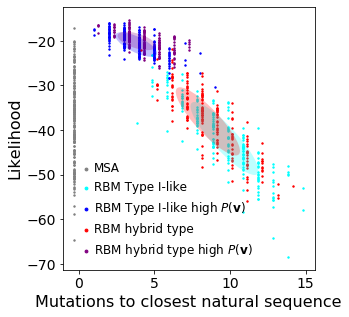

In [10]:
def distance_to_natural(synth_seq,nat_seq): # For each seq in synth_seq, compute the distance to the closest natural sequence 
    min_dists = []
    for seq in synth_seq:
        min_dists.append ((seq[np.newaxis,:] != nat_seq).sum(1).min() )
    return np.array(min_dists)


likelihood_natural = RBM.likelihood(all_data)
likelihood_generated_Type1 = RBM.likelihood(datav_Type1)
likelihood_generated_Type1_lowT = RBM.likelihood(datav_Type1_lowT)
likelihood_generated_TypeHybrid = RBM.likelihood(datav_TypeHybrid) 
likelihood_generated_TypeHybrid_lowT = RBM.likelihood(datav_TypeHybrid_lowT) 

Dmin_natural = np.zeros(len(all_data))
Dmin_generated_Type1 = distance_to_natural(datav_Type1,all_data)
Dmin_generated_Type1_lowT = distance_to_natural(datav_Type1_lowT,all_data)
Dmin_generated_TypeHybrid = distance_to_natural(datav_TypeHybrid,all_data)
Dmin_generated_TypeHybrid_lowT = distance_to_natural(datav_TypeHybrid_lowT,all_data)


Dmins = [Dmin_natural,
         Dmin_generated_Type1,
         Dmin_generated_Type1_lowT,
         Dmin_generated_TypeHybrid,
         Dmin_generated_TypeHybrid_lowT
        ]


likelihoods = [likelihood_natural,
               likelihood_generated_Type1,
               likelihood_generated_Type1_lowT,
               likelihood_generated_TypeHybrid,
               likelihood_generated_TypeHybrid_lowT
              ]


colors = ['gray','cyan','blue','red','purple']
names = ['MSA',
         'RBM Type I-like',
         r'RBM Type I-like high $P({\bf v})$',
         'RBM hybrid type',
         r'RBM hybrid type high $P({\bf v})$',
        ]


fig = plots_utils.scatter_distance_fitness( Dmins, likelihoods
                               , colors = colors, names = names )

